# Explore Bitcoin-core

This is a jupyter notebook for parsing the raw block data from bitcoin-core.

## Imports

In [12]:
import datetime
import sys
from hashlib import sha256

## Genesis Block

In [2]:
# 01000000 6fe28c0ab6f1b372c1a6a246ae63f74f931e8365e15a089c68d6190000000000 982051fd1e4ba744bbbe680e1fee14677ba1a3c3540bf7b1cdb606e857233e0e 61bc6649 ffff001d 01e36299 01 01000000010000000000000000000000000000000000000000000000000000000000000000ffffffff0704ffff001d0104ffffffff0100f2052a0100000043410496b538e853519c726a2c91e61ec11600ae1390813a627c66fb8be7947be63c52da7589379515d4e0a604f8141781e62294721166bf621e73a82cbf2342c858eeac00000000
genesis_block = "010000006fe28c0ab6f1b372c1a6a246ae63f74f931e8365e15a089c68d6190000000000982051fd1e4ba744bbbe680e1fee14677ba1a3c3540bf7b1cdb606e857233e0e61bc6649ffff001d01e362990101000000010000000000000000000000000000000000000000000000000000000000000000ffffffff0704ffff001d0104ffffffff0100f2052a0100000043410496b538e853519c726a2c91e61ec11600ae1390813a627c66fb8be7947be63c52da7589379515d4e0a604f8141781e62294721166bf621e73a82cbf2342c858eeac00000000"
genesis_block

'010000006fe28c0ab6f1b372c1a6a246ae63f74f931e8365e15a089c68d6190000000000982051fd1e4ba744bbbe680e1fee14677ba1a3c3540bf7b1cdb606e857233e0e61bc6649ffff001d01e362990101000000010000000000000000000000000000000000000000000000000000000000000000ffffffff0704ffff001d0104ffffffff0100f2052a0100000043410496b538e853519c726a2c91e61ec11600ae1390813a627c66fb8be7947be63c52da7589379515d4e0a604f8141781e62294721166bf621e73a82cbf2342c858eeac00000000'

In [3]:
# swap_data = bytearray.fromhex(genesis_block)
# swap_data.reverse()
# swap_data.hex()

## Block Data

inspect blk00000.dat

In [4]:
block_zero  = "C:\\Users\\david\\OneDrive\\Documents\\code\\python\\Blockchain\\Bitcoin\\data\\bitcoin_data\\blk00000.dat"
print(block_zero)

C:\Users\david\OneDrive\Documents\code\python\Blockchain\Bitcoin\data\bitcoin_data\blk00000.dat


In [5]:
blk = None
with open(block_zero, 'rb') as f:
    blk = f.readlines()
    # blk = f.read()
    f.close()
blk[0].hex()

'f9beb4d91d0100000100000000000000000000000000000000000000000000000000000000000000000000003ba3edfd7a7b12b27ac72c3e67768f617fc81bc3888a51323a9fb8aa4b1e5e4a29ab5f49ffff001d1dac2b7c0101000000010000000000000000000000000000000000000000000000000000000000000000ffffffff4d04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73ffffffff0100f2052a01000000434104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac00000000f9beb4d9d7000000010000006fe28c0a'

Look at size of blk in memory

In [6]:
blk_size = sys.getsizeof(blk)
print(blk_size)
print(f"size in bytes: {blk_size:,d} bytes")
print(f"size in KB:    {blk_size/1_000:,.2f} KB")
print(f"size in MB:    {blk_size/1_000_000:,.2f} MB")

block_length = 0
for b in blk:
    block_length += len(b)
print(f"block length:  {block_length:,d}")

3292664
size in bytes: 3,292,664 bytes
size in KB:    3,292.66 KB
size in MB:    3.29 MB
block length:  134,215,086


In [7]:
f"{int(len(blk[0].hex()))/2:,.0f}"

'309'

### network

In [8]:
network = {
    'f9beb4d9': 'mainnet',
    '0b110907': 'Testnet3',
    'fabfb5da': 'Regtest'
}

magic_number = blk[0][:4].hex()
print(network[magic_number])
print(magic_number)

magic_number_byte = bytearray.fromhex(magic_number)
magic_number_byte.reverse()
print(magic_number_byte.hex())

mainnet
f9beb4d9
d9b4bef9


### magic number and block size

In [9]:
block_dat = blk[0].hex()
magic_number_dat = block_dat[:8]
size_dat = block_dat[8:16]
print(block_dat)
print()
print(f"network: {network[magic_number_dat]}")
size_dat_swap = bytearray.fromhex(size_dat)
size_dat_swap.reverse()
block_size_raw = int(size_dat_swap.hex(), 16)+8
block_size = block_size_raw*2
print(f"block size raw:    {block_size_raw}")
print(f"block size:        {block_size}")
genesis_block_dat = block_dat[16:block_size]
print(f"genesis block dat: {len(genesis_block_dat)}")
print()

f9beb4d91d0100000100000000000000000000000000000000000000000000000000000000000000000000003ba3edfd7a7b12b27ac72c3e67768f617fc81bc3888a51323a9fb8aa4b1e5e4a29ab5f49ffff001d1dac2b7c0101000000010000000000000000000000000000000000000000000000000000000000000000ffffffff4d04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73ffffffff0100f2052a01000000434104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac00000000f9beb4d9d7000000010000006fe28c0a

network: mainnet
block size raw:    293
block size:        586
genesis block dat: 570



### block header

In [11]:
block_header = block_dat[24:160+16]
print(block_header)
block_header_swap = bytearray.fromhex(block_header)
block_header_swap.reverse()
print(block_header_swap.hex())
print(f"length of block header: {len(block_header)}")
print()

version_dat = block_dat[16:24]
print(version_dat)
version_dat_swap = bytearray.fromhex(version_dat)
version_dat_swap.reverse()
print(f"version: {int(version_dat_swap.hex(), 16)}")
print()

prev_block = block_header[0:64]
print(prev_block)
prev_block_swap = bytearray.fromhex(prev_block)
prev_block_swap.reverse()
print(f"prev block: {int(prev_block_swap.hex(), 16)}")
print()

merkle_root = block_header[64:128]
print(merkle_root)
merkle_root_swap = bytearray.fromhex(merkle_root)
merkle_root_swap.reverse()
print(f"merkle root: {merkle_root_swap.hex()}")
print()

block_time = block_header[128:128+8]
print(block_time)
block_time_swap = bytearray.fromhex(block_time)
block_time_swap.reverse()
print(f"block swap: {block_time_swap.hex()}")
block_time_utc = datetime.datetime.fromtimestamp(int(block_time_swap.hex(), 16))
print(f"block time: {block_time_utc}")
print()

block_bits = block_header[136:136+8]
print(block_bits)
block_bits_swap = bytearray.fromhex(block_bits)
block_bits_swap.reverse()
print(f"block bits swap: {block_bits_swap.hex()}")
print()

block_nonce = block_header[144:144+8]
print(block_nonce)
block_nonce_swap = bytearray.fromhex(block_nonce)
block_nonce_swap.reverse()
print(f"block nonce swap: {int(block_nonce_swap.hex(), 16)}")
print()

00000000000000000000000000000000000000000000000000000000000000003ba3edfd7a7b12b27ac72c3e67768f617fc81bc3888a51323a9fb8aa4b1e5e4a29ab5f49ffff001d1dac2b7c
7c2bac1d1d00ffff495fab294a5e1e4baab89f3a32518a88c31bc87f618f76673e2cc77ab2127b7afdeda33b0000000000000000000000000000000000000000000000000000000000000000
length of block header: 152

01000000
version: 1

0000000000000000000000000000000000000000000000000000000000000000
prev block: 0

3ba3edfd7a7b12b27ac72c3e67768f617fc81bc3888a51323a9fb8aa4b1e5e4a
merkle root: 4a5e1e4baab89f3a32518a88c31bc87f618f76673e2cc77ab2127b7afdeda33b

29ab5f49
block swap: 495fab29
block time: 2009-01-03 13:15:05

ffff001d
block bits swap: 1d00ffff

1dac2b7c
block nonce swap: 2083236893



#### Block Hash SHA256

In [59]:
# ersion + prev block + merkle root + block time + block bits + block nonce
blockHeader = bytearray.fromhex(block_dat[16:160+16])
blockHashSHA265_single = sha256(blockHeader).digest()
blockHashSHA265_double = sha256(blockHashSHA265_single).hexdigest() # sha256(blockHeader.encode('utf-8')).hexdigest()
print(f"block header             : {blockHeader.hex()}")
print(f"block hash SHA 256 single: {blockHashSHA265_single.hex()}")
print(f"block hash SHA 256 double: {blockHashSHA265_double}")

blockHashSHA265_swap = bytearray.fromhex(blockHashSHA265_double)
blockHashSHA265_swap.reverse()
print(f"block hash SHA 256 swap  : {blockHashSHA265_swap.hex()}")

block header             : 0100000000000000000000000000000000000000000000000000000000000000000000003ba3edfd7a7b12b27ac72c3e67768f617fc81bc3888a51323a9fb8aa4b1e5e4a29ab5f49ffff001d1dac2b7c
block hash SHA 256 single: af42031e805ff493a07341e2f74ff58149d22ab9ba19f61343e2c86c71c5d66d
block hash SHA 256 double: 6fe28c0ab6f1b372c1a6a246ae63f74f931e8365e15a089c68d6190000000000
block hash SHA 256 swap  : 000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f


### transactions

In [12]:
tx_num = block_dat[176:178]
tx_ids = block_dat[178:block_size]

print(tx_num)
tx_num_swap = bytearray.fromhex(tx_num)
tx_num_swap.reverse()
print(f"block bits swap: {int(tx_num_swap.hex(), 16)}")
print(tx_ids)

01
block bits swap: 1
01000000010000000000000000000000000000000000000000000000000000000000000000ffffffff4d04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73ffffffff0100f2052a01000000434104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac00000000


In [13]:
{
  "version": "01000000",
  "inputcount": "01",
  "inputs": [
    {
      "txid": "0000000000000000000000000000000000000000000000000000000000000000",
      "vout": "ffffffff",
      "scriptsigsize": "4d",
      "scriptsig": "04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73",
      "sequence": "ffffffff"
    }
  ],
  "outputcount": "01",
  "outputs": [
    {
      "amount": "00f2052a01000000",
      "scriptpubkeysize": "43",
      "scriptpubkey": "4104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac"
    }
  ],
  "locktime": "00000000"
}

{'version': '01000000',
 'inputcount': '01',
 'inputs': [{'txid': '0000000000000000000000000000000000000000000000000000000000000000',
   'vout': 'ffffffff',
   'scriptsigsize': '4d',
   'scriptsig': '04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73',
   'sequence': 'ffffffff'}],
 'outputcount': '01',
 'outputs': [{'amount': '00f2052a01000000',
   'scriptpubkeysize': '43',
   'scriptpubkey': '4104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac'}],
 'locktime': '00000000'}

In [14]:
print(len(genesis_block))
genesis_block

430


'010000006fe28c0ab6f1b372c1a6a246ae63f74f931e8365e15a089c68d6190000000000982051fd1e4ba744bbbe680e1fee14677ba1a3c3540bf7b1cdb606e857233e0e61bc6649ffff001d01e362990101000000010000000000000000000000000000000000000000000000000000000000000000ffffffff0704ffff001d0104ffffffff0100f2052a0100000043410496b538e853519c726a2c91e61ec11600ae1390813a627c66fb8be7947be63c52da7589379515d4e0a604f8141781e62294721166bf621e73a82cbf2342c858eeac00000000'

## Parse Whole File

parse file by tracking magic numbers.

**Caution:** not parsing transactions

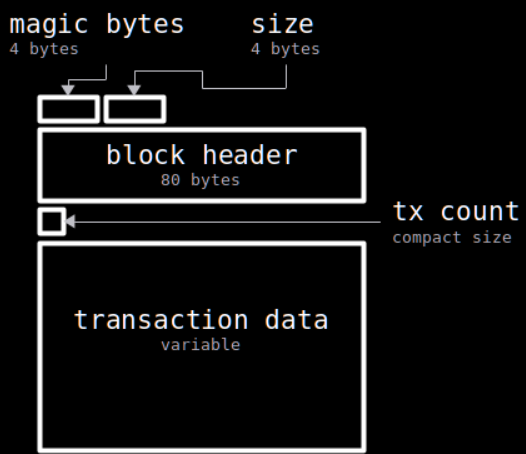

The data above can be split in to five parts:
1. The magic bytes (4 bytes) is a message delimiter indicating the start of a block.
2. The size (4 bytes) indicates the size of the upcoming block in bytes.
3. The block header (80 bytes) is the summary of the block data.
4. The tx count (compact size) indicates how many transactions are in the block.
5. The transaction data (variable) is all of the transactions in the block concatenated one after the other.


In [15]:
network = {
    'f9beb4d9': 'mainnet',
    '0b110907': 'Testnet3',
    'fabfb5da': 'Regtest'
}

In [16]:
blocks = {}
block_remainder = ''
block_height = 0

for i, block in enumerate(blk):
    data_part = block.hex()
    data = block_remainder + data_part
    # split on magic number
    raw_blks = data.split('f9beb4d9')
    block_remainder = 'f9beb4d9' + raw_blks[-1]
    # loop through blocks from split to parse them individually
    for b, raw_blk in enumerate(raw_blks[1:-1]):
        tmp_block = {}
        # print(f"i: {i}, b: {b}")
        block_size_raw = raw_blk[:8]
        block_size_swap = bytearray.fromhex(block_size_raw)
        block_size_swap.reverse()
        block_size = (int(block_size_swap.hex(), 16))*2+8
        if len(raw_blk) != block_size:
            raise ValueError(f"error, expected len(raw_blk) == block_size but got {len(raw_blk)} == {block_size}")

        block_header = raw_blk[16:168]
        block_header_swap = bytearray.fromhex(block_header)
        block_header_swap.reverse()
        # print(f"block header hex: {block_header_swap.hex()}")
        # print(f"length of block header: {len(block_header)}")

        version_dat = raw_blk[8:16]
        version_dat_swap = bytearray.fromhex(version_dat)
        version_dat_swap.reverse()
        tmp_block['version'] = int(version_dat_swap.hex(), 16)
        # print(f"version: {int(version_dat_swap.hex(), 16)}")

        prev_block = block_header[:64]
        prev_block_swap = bytearray.fromhex(prev_block)
        prev_block_swap.reverse()
        tmp_block['prev block'] = int(prev_block_swap.hex(), 16)
        # print(f"prev block: {int(prev_block_swap.hex(), 16)}")

        merkle_root = block_header[64:128]
        merkle_root_swap = bytearray.fromhex(merkle_root)
        merkle_root_swap.reverse()
        tmp_block['merkle root'] = merkle_root_swap.hex()
        # print(f"merkle root: {merkle_root_swap.hex()}")

        block_time = block_header[128:136]
        block_time_swap = bytearray.fromhex(block_time)
        block_time_swap.reverse()
        block_time_utc = datetime.datetime.fromtimestamp(int(block_time_swap.hex(), 16))
        tmp_block['timestamp'] = block_time_utc
        # print(f"block time: {block_time_utc}")

        block_bits = block_header[136:144]
        block_bits_swap = bytearray.fromhex(block_bits)
        block_bits_swap.reverse()
        tmp_block['bits'] = block_bits_swap.hex()
        # print(f"block bits swap: {block_bits_swap.hex()}")

        block_nonce = block_header[144:152]
        block_nonce_swap = bytearray.fromhex(block_nonce)
        block_nonce_swap.reverse()
        tmp_block['nonce'] = int(block_nonce_swap.hex(), 16)
        # print(f"block nonce swap: {int(block_nonce_swap.hex(), 16)}")

        # tx_ids_raw = raw_blk[168:block_size]
        tmp_block['tx ids raw '] = raw_blk[168:block_size]
        # print(f"tx ids raw: {tx_ids_raw}")
        blocks[block_height] = tmp_block
        block_height += 1
    if i == 10:
        break

In [17]:
blocks

{0: {'version': 1,
  'prev block': 0,
  'merkle root': '4a5e1e4baab89f3a32518a88c31bc87f618f76673e2cc77ab2127b7afdeda33b',
  'timestamp': datetime.datetime(2009, 1, 3, 13, 15, 5),
  'bits': '1d00ffff',
  'nonce': 2083236893,
  'tx ids raw ': '0101000000010000000000000000000000000000000000000000000000000000000000000000ffffffff4d04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73ffffffff0100f2052a01000000434104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac00000000'},
 1: {'version': 1,
  'prev block': 10628944869218562084050143519444549580389464591454674019345556079,
  'merkle root': '0e3e2357e806b6cdb1f70b54c3a3a17b6714ee1f0e68bebb44a74b1efd512098',
  'timestamp': datetime.datetime(2009, 1, 8, 21, 54, 25),
  'bits': '1d00ffff',
  'nonce': 2573394689,
  'tx ids raw ': '01010000000100000000000000000000000

## Functions

In [18]:
blk[0].hex()

'f9beb4d91d0100000100000000000000000000000000000000000000000000000000000000000000000000003ba3edfd7a7b12b27ac72c3e67768f617fc81bc3888a51323a9fb8aa4b1e5e4a29ab5f49ffff001d1dac2b7c0101000000010000000000000000000000000000000000000000000000000000000000000000ffffffff4d04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73ffffffff0100f2052a01000000434104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac00000000f9beb4d9d7000000010000006fe28c0a'

In [19]:
def parse_blocks(blks: list[bytes], block_height_start: int=0, block_height_end: int=-1, input_remainder: bytes='') -> list[dict, int, str]:
    blocks = {}
    block_remainder = ''
    # block_height = 0
    blks[0] = input_remainder + blks[0].hex()
    i = 0

    for block in blks:
        data_part = None
        if i == 0:
            data_part = block
            i += 1
        else:
            data_part = block.hex()
        data = block_remainder + data_part
        # split on magic number
        raw_blks = data.split('f9beb4d9')
        block_remainder = 'f9beb4d9' + raw_blks[-1]
        # loop through blocks from split to parse them individually
        for raw_blk in raw_blks[1:-1]:
            tmp_block = {}
            # print(f"i: {i}, b: {b}")
            block_size_raw = raw_blk[:8]
            block_size_swap = bytearray.fromhex(block_size_raw)
            block_size_swap.reverse()
            block_size = (int(block_size_swap.hex(), 16))*2+8
            if len(raw_blk) != block_size:
                raise ValueError(f"error, expected len(raw_blk) == block_size but got {len(raw_blk)} == {block_size}")

            block_header = raw_blk[16:168]
            block_header_swap = bytearray.fromhex(block_header)
            block_header_swap.reverse()
            # print(f"block header hex: {block_header_swap.hex()}")
            # print(f"length of block header: {len(block_header)}")

            version_dat = raw_blk[8:16]
            version_dat_swap = bytearray.fromhex(version_dat)
            version_dat_swap.reverse()
            tmp_block['version'] = int(version_dat_swap.hex(), 16)
            # print(f"version: {int(version_dat_swap.hex(), 16)}")

            prev_block = block_header[:64]
            prev_block_swap = bytearray.fromhex(prev_block)
            prev_block_swap.reverse()
            tmp_block['prev block'] = prev_block_swap.hex()
            # print(f"prev block: {int(prev_block_swap.hex(), 16)}")

            merkle_root = block_header[64:128]
            merkle_root_swap = bytearray.fromhex(merkle_root)
            merkle_root_swap.reverse()
            tmp_block['merkle root'] = merkle_root_swap.hex()
            # print(f"merkle root: {merkle_root_swap.hex()}")

            block_time = block_header[128:136]
            block_time_swap = bytearray.fromhex(block_time)
            block_time_swap.reverse()
            block_time_utc = datetime.datetime.fromtimestamp(int(block_time_swap.hex(), 16))
            tmp_block['timestamp'] = block_time_utc
            # print(f"block time: {block_time_utc}")

            block_bits = block_header[136:144]
            block_bits_swap = bytearray.fromhex(block_bits)
            block_bits_swap.reverse()
            tmp_block['bits'] = block_bits_swap.hex()
            # print(f"block bits swap: {block_bits_swap.hex()}")

            block_nonce = block_header[144:152]
            block_nonce_swap = bytearray.fromhex(block_nonce)
            block_nonce_swap.reverse()
            tmp_block['nonce'] = int(block_nonce_swap.hex(), 16)
            # print(f"block nonce swap: {int(block_nonce_swap.hex(), 16)}")

            # tx_ids_raw = raw_blk[168:block_size]
            tmp_block['tx ids raw '] = raw_blk[168:block_size]
            # print(f"tx ids raw: {tx_ids_raw}")
            blocks[block_height_start] = tmp_block
            block_height_start += 1
        if block_height_start >= block_height_end and block_height_end >= 0:
            break
    return blocks, block_height_start-1, block_remainder

In [20]:
parsed_blocks, block_height, block_remainder = parse_blocks(blks=blk)

In [21]:
block_height_tmp = 0
print(f"{(block_height):,d}")
parsed_blocks[block_height]

119,965


{'version': 1,
 'prev block': '00000000000013aa7f91d6578c8f8db27611f00e7979e5bd2a763c01bc54d55e',
 'merkle root': '6b0af140f1a8df1a217c499c291bbba8bb17074260cbc0c40dfecd65f3c6c859',
 'timestamp': datetime.datetime(2011, 4, 24, 15, 16, 33),
 'bits': '1b00b5ac',
 'nonce': 3628801568,
 'tx ids raw ': '0801000000010000000000000000000000000000000000000000000000000000000000000000ffffffff0704acb5001b013bffffffff018076242a01000000434104178dd412bf89902889acbe9ccbcc28e3540a38ca4ea083d3725c1d89bf5f83880b0fb3e0acfbdb9ff52d574d4d7b205cd15d8b7fbba9bc6145866af97b4712a9ac000000000100000001fea77608cb333840ad6220fcfda335e41b76aeef6b67d248ad3f95cca64c3514000000008c493046022100f9fb8c61a4bc87e0580f0020f7bfc6a806b695757f1da104301ca85a58dd2f610221008d291e3ddb32798c8cd75e04979cf5a567313228d3bdd90e99bbe360d8528139014104c591140ec85ac29f16f0398f955dab9a074eb559b2414bd827539f52dfcb432681dc394609da833459fa5a56d48ea48a4092edca36054d1b734118626b599dc4ffffffff0200371789000000001976a914fc39ff19da5d83ecb3f83ee1c0565545

In [22]:
block_remainder

'f9beb4d9d60d00000100000061f83d88bd88a9df3e6918a5e0fe10a26a706c285ee067b04800000000000000ac8a75c8c47a1bdbf8e09741afdb21e5de790b18a9bbd06fa6fab9b2db0531d1e779b44dacb5001bdacbf25e0701000000010000000000000000000000000000000000000000000000000000000000000000ffffffff0704acb5001b0134ffffffff014034152a01000000434104e7739ed00d9913ec2d74b88f7a902e097e0e62ef93faf89c13e67638a2f2f1faec303c7435ef649087009914d420151f82ac714ca7acac6b9c003515bbdcf903ac00000000010000000174c434e2f464d9dd919081bbb7e15d81779164bd2b4a326f9848dbd809b6d852000000008b48304502206bbc82476a739981a27e397dfafdd9e0aecb423ed700b8b93960b22add8bd847022100bf06b6c646c221e3a47010d698a117830c6e9176481eec928084b69f94f302e00141046c2f7a170eee80fd18aa7e160ad8d2b0891d9d99a26fb51565e3b41b384d291d60e942db69f50801ca68afc576f01373f99e13b9db628b9651d1b7d7482dcab4ffffffff0200d8c142000000001976a914c7ac06d52d4e17be9e014445591cbacfb3747d7588ac0065cd1d000000001976a91474cf4b7b0c181cd34e54ca297dc28423fa1354ed88ac000000000100000001217df9c13e6c03a406f38480b0f

In [23]:
block_one = "C:\\Users\\david\\OneDrive\\Documents\\code\\python\\Blockchain\\Bitcoin\\data\\bitcoin_data\\blk00001.dat"

blk1 = None
with open(block_one, 'rb') as f:
    blk1 = f.readlines()
    # blk = f.read()
    f.close()
blk1[0].hex()

'f9beb4d99f370000010000008b7e568b4c2b8a1a5c1ceb0c7ff0f198bbc1a84fbd6fab31a8010000000000009ffaf0fb869146616669e4a9193a1971e7af5dd554bfffd7e3f1b6b5fcacfe62126db44dacb5001b5f40683c2801000000010000000000000000000000000000000000000000000000000000000000000000ffffffff0704acb5001b0108ffffffff01000dbd2a010000004341044a4b5f88dbd24fd319c7cba47958299b7fa5135e517d92ca84726163f717c57b651b96ebe3a0546baafb05747316e7490439a857b11696e9e86cfe0d9c4907abac000000000100000001e2916e83b0c2c1a709d2117cd99314e8a9b05166939a71fc48c4a3b5bdc79ce8010000008b483045022100f36e609a616c2848e9cd6bcfafaf93efac9cfa01aea55a7d9265f05be164ed6b02200ff6c7b53fa34bb5e27f5d25f1ed7b75dc819276d4319cdbe26e521eb1f31523014104d8bc469ee17c7c2f4ab06c1d8ee41a7577dffc6058e15b597c73f0672b9c59bcced2bd99b150e1efb20c852f749a4bc1d6bd573076b41d0671ed1abd78d4dcb4ffffffff0100e1f505000000001976a9147a9ef6d1f4426ccd017eb783d1c7aea06139bde088ac000000000100000002cd1842373d9d8dc6f6d41da2cf9a628822f74791d9af76032c4008b9b269deeb000000004948304502204e48cac06f5

In [24]:
parsed_blocks1, block_height1, block_remainder1 = parse_blocks(blks=blk1, block_height_start=block_height,  input_remainder=block_remainder)

In [25]:
print(f"{(block_height1 - block_height):,d}")
print(f"{(block_height1):,d}")
parsed_blocks1[block_height1]

11,269
131,234


{'version': 1,
 'prev block': '0000000000000f83ddd7977e0957c2ddbb32a3cfb07c67d29a86d78fca652af6',
 'merkle root': '24432e095a2acf438660b5b235e2d4490efc5811e0598fba5bf54b44955f5f92',
 'timestamp': datetime.datetime(2011, 6, 16, 7, 44, 44),
 'bits': '1a132185',
 'nonce': 4060573036,
 'tx ids raw ': '6501000000010000000000000000000000000000000000000000000000000000000000000000ffffffff08048521131a02a803ffffffff01cb7b4c2b0100000043410499cd45d56a8a1295e44cf48b91807d6d9315c26a58e0401525d9c62fd0b3b681e4b8bdd6d7c282081466d026cea55f89ac48fc30d3ed506700baa5ffd677124fac000000000100000001b2848d70248bcb160851f029dd55b3fbca1436d2cc4e1214ee955c9175c256d8010000008c493046022100a22d577ffd7e7ed6552eeba6c850791341e66973cb30e21e1849a069541c59eb022100fc5ddc0e1be2a78c6d6fe2a1e2410a9d77fde4c2ffa46650b24bfbbe5fed88da01410496d2f40b0440919d832a7045636efde57308df38b58c0eb2b38168ee002ba9defd03e0904e532b54fa2fc4af7d06aaae1ee61a7a5a34e98741b526f6d5c537a9ffffffff0200a3e111000000001976a9149401c2d4ed9845c65ffff8b55398050

In [26]:
block_remainder1

'f9beb4d9e40b000001000000356da0b44d8f8f01deeff22fa843a830ded95a964053a3637404000000000000ed40037fbb8ade6ff24db4443305fd58da9b371fa150ab50cf6abbab2cad1a2d59f4f94d8521131a52b149940a01000000010000000000000000000000000000000000000000000000000000000000000000ffffffff07048521131a0169ffffffff01a078072a0100000043410405cbc16278c71164aa3ac7c92b222daf4d2db1bade712cc23f1f961661161646f23a3dc2355d57603549ad35dfb1934976a5fbd233aa16b7844133fabf0c4a24ac00000000010000000125ad50aea118cc4dc17d694fbde4789a7f1e0cb01b2e01af8b63185b9eaa237e000000008a473044022046e3e5cb02db287b8af30326abf22bf7f6db068d76aa858a2c5c60ab5a0dd300022057688a95b2ddb90dedd669162dc7265e25f699383e8faead2a4223c728689fa1014104cbd7f8aec8aab083e9e3b493c2619be63339ae3b78d58c18ca870b28660a63ae5cf328a811bec2c70a7dafcde6a7c4e24d367cf12f079da18fa562562a6a4ed8ffffffff0240b24ec4770000001976a914743d03fb4eb41be797a11597bc8f727e82db01eb88acc050aa20010000001976a9148b5c8f342312e02af0d0cf292b2f779fddfd6c2688ac00000000010000000133bcdfdcb3c5cd6cdcec27011760e

In [27]:
_array = "249 190 180 217 29 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 59 163 237 253 122 123 18 178 122 199 44 62 103 118 143 97 127 200 27 195 136 138 81 50 58 159 184 170 75 30 94 74 41 171 95 73 255 255 0 29 29 172 43 124 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 77 4 255 255 0 29 1 4 69 84 104 101 32 84 105 109 101 115 32 48 51 47 74 97 110 47 50 48 48 57 32 67 104 97 110 99 101 108 108 111 114 32 111 110 32 98 114 105 110 107 32 111 102 32 115 101 99 111 110 100 32 98 97 105 108 111 117 116 32 102 111 114 32 98 97 110 107 115 255 255 255 255 1 0 242 5 42 1 0 0 0 67 65 4 103 138 253 176 254 85 72 39 25 103 241 166 113 48 183 16 92 214 168 40 224 57 9 166 121 98 224 234 31 97 222 182 73 246 188 63 76 239 56 196 243 85 4 229 30 193 18 222 92 56 77 247 186 11 141 87 138 76 112 43 107 241 29 95 172 0 0 0 0 249 190"
_array.split(" ")
tmp_array = []

for n in _array.split(" "):
    tmp_array.append(int(n))
tmp_array

[249,
 190,
 180,
 217,
 29,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 59,
 163,
 237,
 253,
 122,
 123,
 18,
 178,
 122,
 199,
 44,
 62,
 103,
 118,
 143,
 97,
 127,
 200,
 27,
 195,
 136,
 138,
 81,
 50,
 58,
 159,
 184,
 170,
 75,
 30,
 94,
 74,
 41,
 171,
 95,
 73,
 255,
 255,
 0,
 29,
 29,
 172,
 43,
 124,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 77,
 4,
 255,
 255,
 0,
 29,
 1,
 4,
 69,
 84,
 104,
 101,
 32,
 84,
 105,
 109,
 101,
 115,
 32,
 48,
 51,
 47,
 74,
 97,
 110,
 47,
 50,
 48,
 48,
 57,
 32,
 67,
 104,
 97,
 110,
 99,
 101,
 108,
 108,
 111,
 114,
 32,
 111,
 110,
 32,
 98,
 114,
 105,
 110,
 107,
 32,
 111,
 102,
 32,
 115,
 101,
 99,
 111,
 110,
 100,
 32,
 98,
 97,
 105,
 108,
 111,
 117,
 116,
 32,
 102,
 111,
 114,
 32